# IMPORTING LIBRARIES AND DEPENDECIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING THE FILE

In [2]:
data=pd.read_csv('quikr_car.csv')  

# BASIC ANALYSIS

In [3]:
data.head()   #To view the top 5 rows along with its column name

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
#To find the total number of rows and column present
data.shape   #(rows,columns)

(892, 6)

In [5]:
#To find the type of data present and null values present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
data.columns  #To find the number of columns present

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [7]:
data.isnull().sum()  #Using this we can find the featues with NaN value

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

### So we will be handling 2 coulmns  ==>kms_driven and fuel_type.

# 1.COLUMN kms_driven IS ANALYSED FIRST

In [8]:
data['kms_driven'].value_counts()
#Here we need to remove the unit (kms) plus the dtype of this column is not integer

45,000 kms      30
35,000 kms      30
55,000 kms      25
50,000 kms      23
20,000 kms      22
                ..
1,03,553 kms     1
29,685 kms       1
30,874 kms       1
49,800 kms       1
1,66,000 kms     1
Name: kms_driven, Length: 258, dtype: int64

In [9]:
#To view the top 10 rows with values
data[data['kms_driven'].isnull()].head(10)

,name,company,year,Price,kms_driven,fuel_type
69,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
85,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
195,"Tata indigo ecs LX, 201",Tata,150k,"1,50,000",NaN,NaN
206,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",NaN,NaN
286,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
294,Yama,Yamaha,r 15,"55,000",NaN,NaN
360,selling car Ta,selling,Zest,Ask For Price,NaN,NaN
368,Tata Zest 90,Tata,/-Rs,Ask For Price,NaN,NaN
385,Maruti Suzuki Swift Dzire car,Maruti,sale,"3,00,000",NaN,NaN


In [10]:
#First let's remove the commas from the km driven
data['kms_driven']=data['kms_driven'].str.replace(',','')

In [11]:
data['kms_driven'].head()  #The commas are removed

0    45000 kms
1       40 kms
2    22000 kms
3    28000 kms
4    36000 kms
Name: kms_driven, dtype: object

In [12]:
#Second let;s remove the units from this
data['kms_driven'] = data['kms_driven'].str.split(' ').str[0] #We will the first index alone (which is the desired one)

In [13]:
data['kms_driven']   #The units are also removed

0       45000
1          40
2       22000
3       28000
4       36000
        ...  
887       NaN
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 892, dtype: object

In [14]:
#Using this we found that we are two values Petrol in this coulmn
indices=np.where(data['kms_driven']=='Petrol')[0]
rows = data.iloc[indices]
print(rows)

                          name    company  year     Price kms_driven fuel_type
890   Honda Amaze 1.2 E i VTEC      Honda  2014  1,80,000     Petrol       NaN
891  Chevrolet Sail 1.2 LT ABS  Chevrolet  2014  1,60,000     Petrol       NaN


In [15]:
#To handle these two data alone we need to use
data['kms_driven'] = data['kms_driven'].replace('Petrol', 0) #We are specifically searching this value

In [16]:
#What is the type of values present in this column
data.dtypes   #kms_driven is object type
data['kms_driven'] = data['kms_driven'].fillna(0).astype(int)

In [17]:
#Now we can fill the 0 values with mean
mean_kms_driven = data['kms_driven'].mean()  #To compute the mean value
data['kms_driven'] = data['kms_driven'].replace(0,mean_kms_driven).astype(int) #Here the 0 is replaced with the mean value.

In [18]:
data['kms_driven']

0      45000
1         40
2      22000
3      28000
4      36000
       ...  
887    43225
888    27000
889    40000
890    43225
891    43225
Name: kms_driven, Length: 892, dtype: int32

In [19]:
data['kms_driven'].isnull().sum()

0

In [20]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven     0
fuel_type     55
dtype: int64

### All the necessary changes are made to this column

# ANALYSE  "fuel_type"  COLUMN

In [21]:
data['fuel_type'].value_counts()  #To find the type of values present

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

In [22]:
data[data['fuel_type'].isnull()].head(10)  #To view the top 10 rows with NaN values.

,name,company,year,Price,kms_driven,fuel_type
69,I want to sell my car Tata Zest,I,2017,Ask For Price,43225,NaN
85,I want to sell my car Tata Zest,I,2017,Ask For Price,43225,NaN
132,Toyota Corolla,Toyota,2009,"2,75,000",26000,NaN
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,43225,NaN
195,"Tata indigo ecs LX, 201",Tata,150k,"1,50,000",43225,NaN
206,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",43225,NaN
286,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,43225,NaN
294,Yama,Yamaha,r 15,"55,000",43225,NaN
360,selling car Ta,selling,Zest,Ask For Price,43225,NaN
368,Tata Zest 90,Tata,/-Rs,Ask For Price,43225,NaN


In [23]:
# Replace missing values with the mode of the column
mode_fuel_type=data['fuel_type'].mode()[0]  #To determine the mode value(mode=most frequent value)
data['fuel_type'] = data['fuel_type'].fillna(mode_fuel_type)

In [24]:
data['fuel_type'].isnull().sum()

0

In [25]:
data.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [26]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000,Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",43225,Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000",27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000",40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",43225,Petrol


# NULL CASES ARE HANDLED COMPLETELY

# PRICE COLUMN ANALYSIS

In [27]:
#Here the values contains ask for price,those values need to be handled properly
data['Price'].value_counts()

Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
                 ..
7,49,999          1
11,30,000         1
10,74,999         1
3,24,999          1
5,00,001          1
Name: Price, Length: 274, dtype: int64

In [28]:
#We need to remove the commas from the value in this feature 
data['Price']=data['Price'].str.replace(',','')
data['Price']

0              80000
1             425000
2      Ask For Price
3             325000
4             575000
           ...      
887           310000
888           260000
889           390000
890           180000
891           160000
Name: Price, Length: 892, dtype: object

In [29]:
#Here NaN values are not present instead it is filled with "Ask For Price".
data['Price'].isnull().sum()

0

In [30]:
#How to handle this case,First let's replace "Ask For Price" as NaN 
data['Price'] = data['Price'].replace('Ask For Price', np.nan)

In [31]:
data['Price'].value_counts()

250000     17
350000     14
180000     13
400000     12
130000     12
           ..
749999      1
1130000     1
1074999     1
324999      1
500001      1
Name: Price, Length: 273, dtype: int64

In [32]:
data[data['Price'].isnull()]   #Now we can treat them as NaN value and perform the analyses.

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,NaN,22000,Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,NaN,59000,Diesel
69,I want to sell my car Tata Zest,I,2017,NaN,43225,Petrol
85,I want to sell my car Tata Zest,I,2017,NaN,43225,Petrol
138,Maruti Suzuki Alto 800 Lxi,Maruti,2018,NaN,28028,Petrol
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,NaN,43225,Petrol
286,"Commercial , DZire LDI, 2016, for sale",Commercial,...,NaN,43225,Petrol
295,Maruti Suzuki Swift LDi,Maruti,2010,NaN,52000,Diesel
304,Tata Indica eV2 LS,Tata,2017,NaN,84000,Diesel
360,selling car Ta,selling,Zest,NaN,43225,Petrol


In [33]:
# First fill the NaN value with value 0
data['Price']=data['Price'].fillna(0).astype(int)
# Replace missing values with the median of the column
median_Price=data['Price'].median()
data['Price'] = data['Price'].replace(0,median_Price).astype(int)

In [34]:
data['Price'].value_counts() 

284999     40
250000     17
350000     14
180000     13
130000     12
           ..
749999      1
1130000     1
1074999     1
324999      1
500001      1
Name: Price, Length: 273, dtype: int64

In [35]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,284999,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,310000,43225,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,43225,Petrol


# HANDLING YEAR COLUMN

In [36]:
data['year'].value_counts()  #The number of occurence of particular type can be observed

2015    117
2014     94
2013     94
2016     76
2012     75
       ... 
ture      1
emi       1
able      1
no.       1
zest      1
Name: year, Length: 61, dtype: int64

In [37]:
data['year'].unique()  #To find the unique values present inside this feature

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [38]:
data['year'].str.isnumeric() #To find the remaining number of rows left

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [39]:
#To get only the numeric value from this we can use isnumeric() and assign it back to the price column itself.
data=data[data['year'].str.isnumeric()]
data['year']=data['year'].astype(int)   #convert it into type int

C:\Users\dsaiy\AppData\Local\Temp\ipykernel_21428\1756916932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['year'].astype(int)   #convert it into type int


In [40]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,284999,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,43225,Petrol


In [41]:
data.dtypes

name          object
company       object
year           int32
Price          int32
kms_driven     int32
fuel_type     object
dtype: object

In [42]:
#Let's reduce the size of name column so that the data becomes easy to interpret.
data['name']=data['name'].str.split().str[:3].str.join(' ')
#We are splitted the data and using slicing to selected the first 4 words and again join them with space inbetween.

C:\Users\dsaiy\AppData\Local\Temp\ipykernel_21428\1218039371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name']=data['name'].str.split().str[:3].str.join(' ')


In [43]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,284999,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2,Honda,2014,180000,43225,Petrol


### DATA CLEANING PROCESS IS OVER

In [44]:
#Used to gain statistical knowledge.
data.describe()

,year,Price,kms_driven
count,842.000000,8.420000e+02,842.000000
mean,2012.523753,4.075197e+05,46408.005938
std,4.024601,4.684041e+05,34092.798167
min,1995.000000,3.000000e+04,5.000000
25%,2010.000000,1.782500e+05,27000.000000
50%,2013.000000,2.899995e+05,41400.000000
75%,2015.000000,4.899990e+05,56300.000000
max,2019.000000,8.500003e+06,400000.000000


# VISUALISE THE REALATIONSHIPS

In [45]:
#To import styles module
from matplotlib import style 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


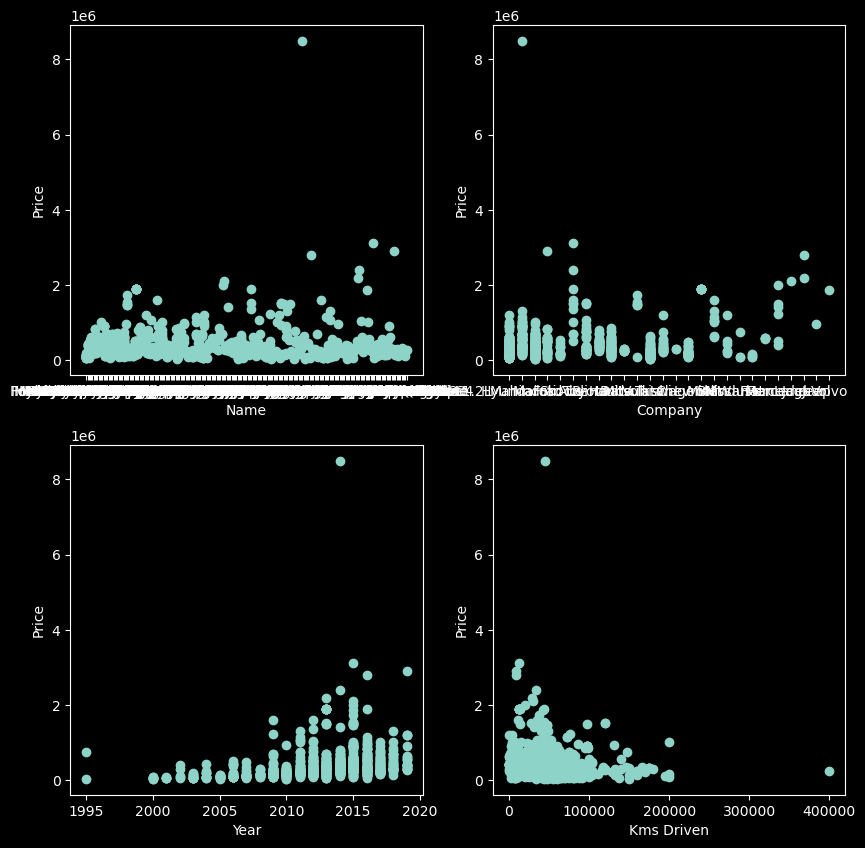

In [46]:
style.use('dark_background')
fig,axs = plt.subplots(2, 2, figsize=(10, 10))  #2 row and 2 column
# Relation between name and price   (0 row 0 column)
axs[0, 0].scatter(data['name'], data['Price'])
axs[0, 0].set_xlabel('Name')
axs[0, 0].set_ylabel('Price')
#Relation between company and price   (0 row 1 column)
axs[0, 1].scatter(data['company'], data['Price'])
axs[0, 1].set_xlabel('Company')
axs[0, 1].set_ylabel('Price')
#Relation between year and price      (1 row 0 column)
axs[1, 0].scatter(data['year'], data['Price'])
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Price')
#Relation between kms_driven and price    (1 row 1 column)
axs[1, 1].scatter(data['kms_driven'], data['Price'])
axs[1, 1].set_xlabel('Kms Driven')
axs[1, 1].set_ylabel('Price')
#To display the plot 
plt.show()

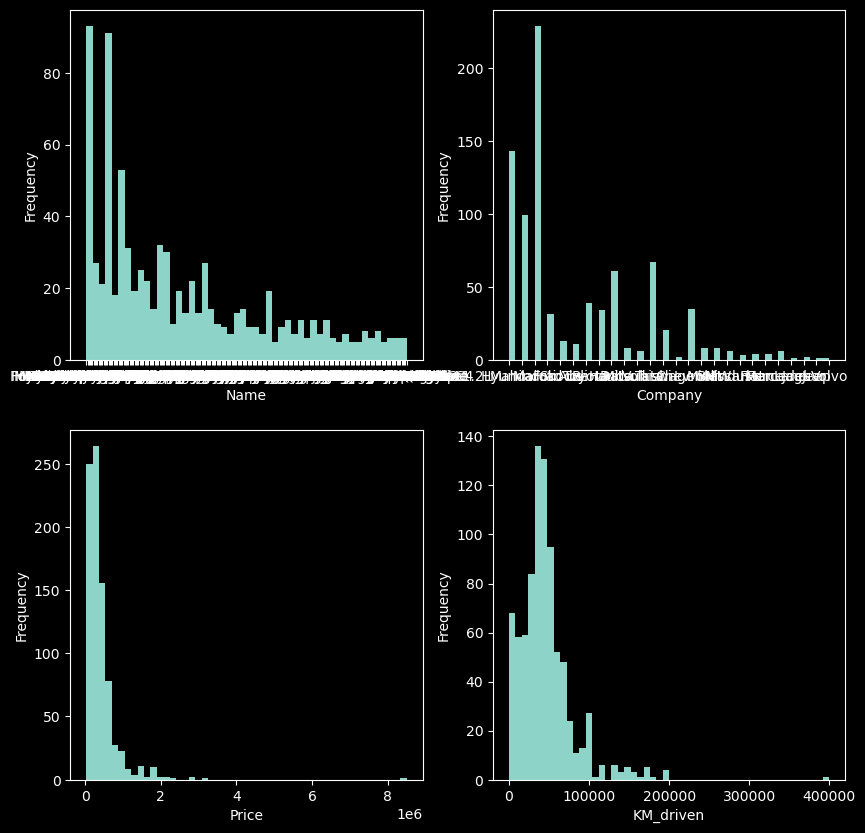

In [47]:
#We can use histogram to view the relation as well
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Relation between name and price   (0 row 0 column)
axs[0, 0].hist(data['name'],bins=50)
axs[0, 0].set_xlabel('Name')
axs[0, 0].set_ylabel('Frequency')
# Relation between name and price   (0 row 0 column)
axs[0, 1].hist(data['company'],bins=50)
axs[0, 1].set_xlabel('Company')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(data['Price'],bins=50)
axs[1, 0].set_xlabel('Price')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(data['kms_driven'],bins=50)
axs[1, 1].set_xlabel('KM_driven')
axs[1, 1].set_ylabel('Frequency')

plt.show()
#we need to remove the outliers
data=data[data['Price']<6000000]

# DEFINING DEPENDENT AND INDEPENDENT VARIABLES

In [49]:
x=data.drop(columns='Price')   #Dependent variable  (excluding price)
y=data['Price']                #Independent variable (price column alone)
print(np.shape(x),np.shape(y))

(841, 5) (841,)


# OUTLIER ANALYSIS

### COMPANY VS PRICE

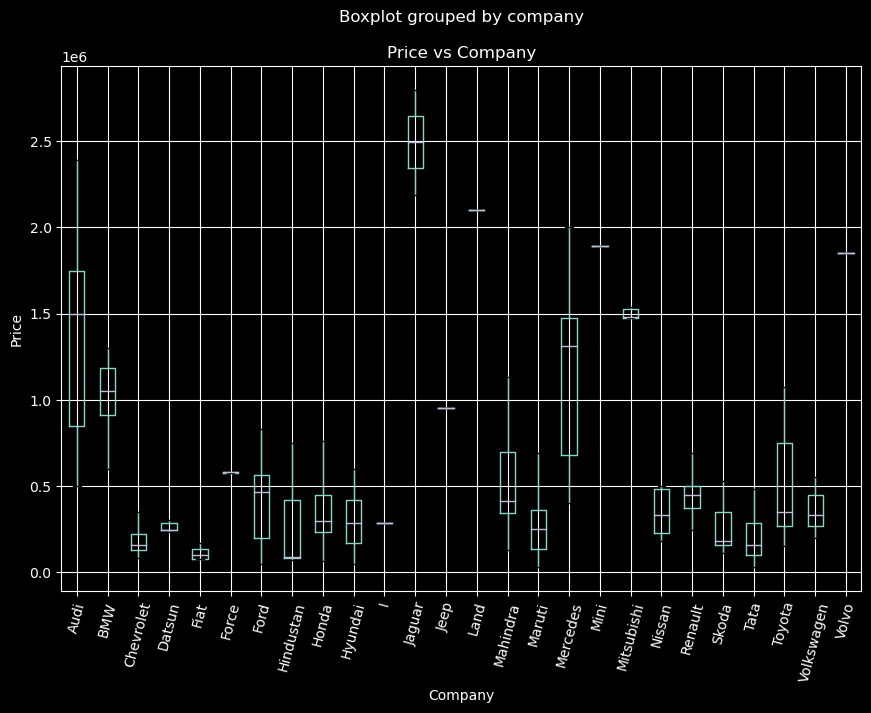

In [50]:
style.use('dark_background')
# Create a boxplot for the 'Price' column grouped by the 'Company' column
fig, ax = plt.subplots(figsize=(10, 7))
bp = data.boxplot(column='Price', by='company', ax=ax, showfliers=False)
plt.xticks(rotation=75) #To rotate the x xis label so that it is more clearly visible
# Set the title and axis labels
ax.set_title('Price vs Company')
ax.set_xlabel('Company')
ax.set_ylabel('Price')

plt.show()

### FUEL_TYPE VS PRICE

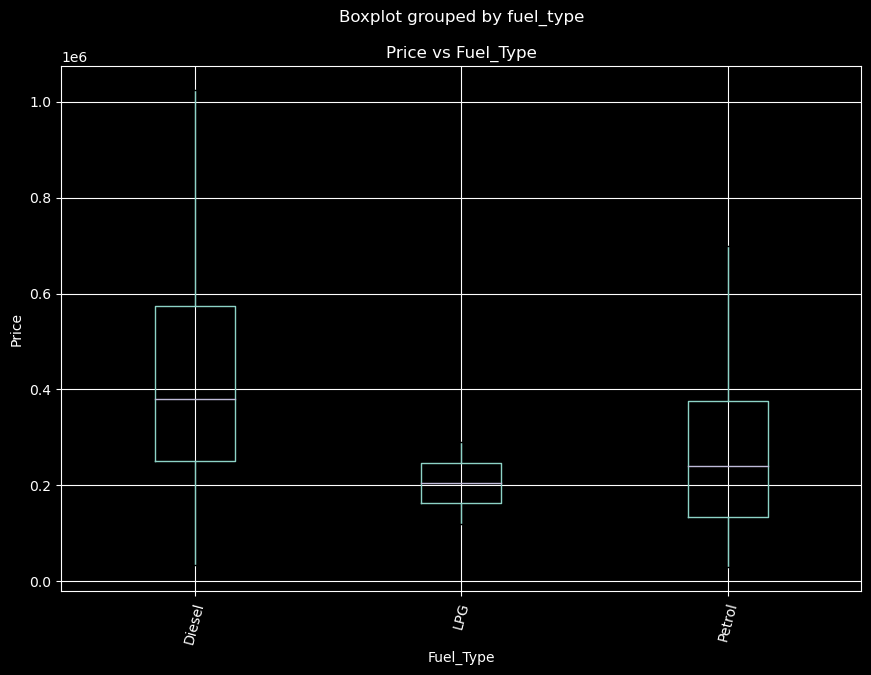

In [51]:
style.use('dark_background')
# Create a boxplot for the 'Price' column grouped by the 'Fuel_Type' column
fig, ax = plt.subplots(figsize=(10, 7))
bp = data.boxplot(column='Price', by='fuel_type', ax=ax, showfliers=False)
plt.xticks(rotation=75) #To rotate the x xis label so that it is more clearly visible
# Set the title and axis labels
ax.set_title('Price vs Fuel_Type')
ax.set_xlabel('Fuel_Type')
ax.set_ylabel('Price')

plt.show()

# TRAIN AND TEST DATA SEPERATION

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [112]:
from sklearn.model_selection import train_test_split
lr=LinearRegression()
x=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x.shape

(841, 5)

In [113]:
y.shape

(841,)

In [114]:
#We are creating one hot encoder
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])   #These are the ones to perform one hot encoding.

OneHotEncoder()

In [115]:
# Create a column transformer to apply one-hot encoding to specific columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [116]:
#make_pipeline is used to create a pipeline that applies the column_trans transformer (which performs one-hot encoding on specific columns of your dataset) 
#Followed by the Regression (which fits a linear regression model to the transformed data).
pipe = make_pipeline(column_trans,lr)

In [117]:
#Fitting the model
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'I', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [1]:
#Prediction for test data
y_pred=pipe.predict(x_test)

NameError: name 'pipe' is not defined

In [ ]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

In [ ]:
score=r2_score(y_test,y_pred)   #R square is important parameter to be conidered in linear regression computation.
print(score)

In [121]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [122]:
scores[np.argmax(scores)]

0.863993903487188

In [96]:
#To perform prediction from the input data provided.
input_data = pd.DataFrame(columns=x_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2009,90000,'Diesel']).reshape(1,5))

#To find the predicted value
predicted_price = pipe.predict(input_data)

#Here the price column has undergone log transformation so converting it back
#predicted_price = np.exp(predicted_price)
predicted_price

array([180968.27874837])

In [123]:
#The actual price is around 1,85,000 the predicted output is 1,80,968.